# Logistic growth

In [1]:
from IPython.display import HTML      # For animation.
from matplotlib import animation      # For animation.
from matplotlib import pyplot as plt  # For plotting.
import numpy as np                    # For solving ODE.
from scipy.integrate import odeint    # For solving ODE.

## Model 

In [5]:
# Parameters.
r = 0.4    # Growth coefficient.
K = 100    # Maximum population, capacity.
t0 = 0.0   # Initial time.
t1 = 20.0  # Final time.
y0 = 10    # Initial population.

# Model.
# TODO: Implement the ODE for logistic growth. Use r and K as parameters.
F = lambda y, t: r*y*(1 - y/K)

## Solution

In [6]:
# Solve ODE.
t = np.linspace(t0, t1, 200)
y = odeint(F, y0, t)

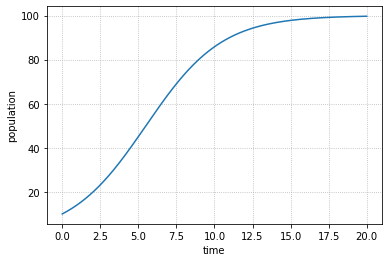

In [7]:
# Plot populations vs. time.
plt.plot(t, y)
plt.xlabel('time')
plt.ylabel('population')
plt.grid(linestyle=':')
plt.show()

## Animation 

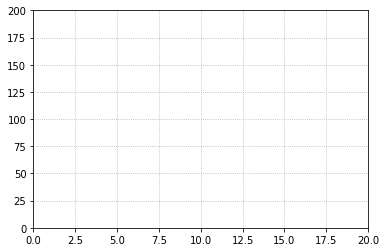

In [8]:
# Same plot, but as an animation.
# http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
FRAMES = 100

fig, ax = plt.subplots()
ax.grid(linestyle=':')
ax.set_xlim((t0, t1))    # Range of x-axis.
ax.set_ylim((0, 200))  # Range of y-axis.

line = ax.plot([], [], lw=2)[0]

def init():
    line.set_data([], [])
    return [line]

def animate(i):
    # Take only first (i/FRAMES) points.
    k = len(t) * i // FRAMES
    line.set_data(t[:k], y[:k])
    return [line]

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=FRAMES, interval=50, blit=True)

In [9]:
# Create a video.
HTML(anim.to_html5_video())

## Multiple initial conditions 

In [10]:
# Calculate results for multiple initial conditions.
# We simply pass a list of initial conditions to `odeint`,
# so that it integrates all variants simultaneously.
y0_ = [1, 5, 10, 15, 30, 50, 70, 90, 100, 110, 130, 150, 170, 190]
y_ = odeint(F, y0_, t)

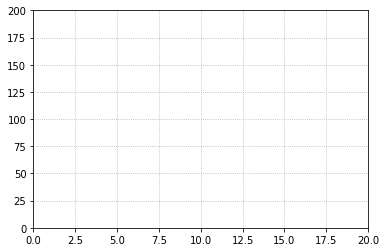

In [11]:
# Show one line for each initial condition.
# Each line is gradually included onto the plot.
FRAMES_PER_LINE = 20
N = len(y0_)  # How many different initial conditions?

fig, ax = plt.subplots()
ax.grid(linestyle=':')
ax.set_xlim((t0, t1))    # Range of x-axis.
ax.set_ylim((0, 200))  # Range of y-axis.

# Create one line for each initial condition.
lines = [ax.plot([], [], lw=2)[0] for _ in range(N)]

def init():
    for line in lines:
        line.set_data([], [])
    return lines

def animate(i):
    for j, line in enumerate(lines):
        if i >= FRAMES_PER_LINE * (j + 1):
            # Full line.
            line.set_data(t, y_[:, j])
        elif i >= FRAMES_PER_LINE * j:
            # Partial line.
            k = i - FRAMES_PER_LINE * j
            k = k * len(t) // FRAMES_PER_LINE
            line.set_data(t[:k], y_[:k, j])
        else:
            # Too early, no line.
            line.set_data([], [])
    return lines

anim_ = animation.FuncAnimation(
        fig, animate, init_func=init,
        frames=len(y0_) * FRAMES_PER_LINE, interval=50, blit=True)

In [12]:
# Create a video.
HTML(anim_.to_html5_video())